In [1]:
# read data
import pandas as pd

data = pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0: # result>0 means positive 
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative' # negative

In [3]:
import numpy as np

data['SA'] = np.array([analize_sentiment(tweet) for tweet in data['text']])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,SA
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),neutral
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),neutral
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),negative
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),positive
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),negative


In [4]:
# compare results
# TextBlob results
pos_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] == 'positive']
neu_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] == 'neutral']
neg_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['SA'][index] == 'negative']

In [5]:
print("TextBlob sentiment analysis:")
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['text'])))

TextBlob sentiment analysis:
Percentage of positive tweets: 37.28142076502732%
Percentage of neutral tweets: 37.80054644808743%
Percentage of negative tweets: 24.918032786885245%


In [6]:
# manually labelled tweets
m_pos_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['airline_sentiment'][index] == 'positive']
m_neu_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['airline_sentiment'][index] == 'neutral']
m_neg_tweets = [ tweet for index, tweet in enumerate(data['text']) if data['airline_sentiment'][index] == 'negative'] 
print("Manually labelled sentiment ratings:")
print("Percentage of positive tweets: {}%".format(len(m_pos_tweets)*100/len(data['text'])))
print("Percentage of neutral tweets: {}%".format(len(m_neu_tweets)*100/len(data['text'])))
print("Percentage of negative tweets: {}%".format(len(m_neg_tweets)*100/len(data['text'])))

Manually labelled sentiment ratings:
Percentage of positive tweets: 16.14071038251366%
Percentage of neutral tweets: 21.168032786885245%
Percentage of negative tweets: 62.69125683060109%


In [7]:
# draw confusion matrix
from sklearn.metrics import confusion_matrix

manually_labelled_ratings = [rating for index, rating in enumerate(data['airline_sentiment'])]
textblob_generated_ratings = [rating for index, rating in enumerate(data['SA'])]
labels = list(set(manually_labelled_ratings))
conf_mat= confusion_matrix(manually_labelled_ratings, textblob_generated_ratings, labels=labels)

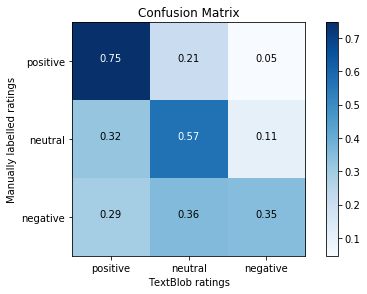

In [8]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name)
    plt.yticks(num_local, labels_name)
    
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Manually labelled ratings')
    plt.xlabel('TextBlob ratings')

plot_confusion_matrix(conf_mat, labels, "Confusion Matrix")
plt.show()